In [3]:
import pandas as pd
df = pd.read_csv('gapminder_full.csv')

In [4]:
df.head()

,country,year,population,continent,life_exp,gdp_cap,Unnamed: 6
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,NaN
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,NaN
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,NaN
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,NaN
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,NaN


In [5]:
num_countries = df['country'].nunique()
print("Number of countries in the dataset:", num_countries)

Number of countries in the dataset: 142


In [6]:
avg_life_exp_pivot = pd.pivot_table(
    df,
    index = 'continent',
    columns = 'year',
    values = 'life_exp',
    aggfunc = 'mean'
)
avg_life_exp_pivot

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


In [7]:
# optional
avg_life_exp_pivot.round(2)

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.14,41.27,43.32,45.33,47.45,49.58,51.59,53.34,53.63,53.60,53.33,54.81
Americas,53.28,55.96,58.40,60.41,62.39,64.39,66.23,68.09,69.57,71.15,72.42,73.61
Asia,46.31,49.32,51.56,54.66,57.32,59.61,62.62,64.85,66.54,68.02,69.23,70.73
Europe,64.41,66.70,68.54,69.74,70.78,71.94,72.81,73.64,74.44,75.51,76.70,77.65
Oceania,69.26,70.30,71.09,71.31,71.91,72.85,74.29,75.32,76.94,78.19,79.74,80.72


In [8]:
df_2007 = df[df['year'] == 2007]
gdp_75 = df_2007['gdp_cap'].quantile(0.75)
gdp_75

np.float64(18008.835639999998)

In [9]:
high_gdp = df_2007[df_2007['gdp_cap'] > gdp_75]
high_gdp[['country','continent','gdp_cap']].sort_values(by = 'gdp_cap', ascending = False)

,country,continent,gdp_cap
1151,Norway,Europe,49357.19017
863,Kuwait,Asia,47306.98978
1367,Singapore,Asia,47143.17964
1619,United States,Americas,42951.65309
755,Ireland,Europe,40675.99635
671,"Hong Kong, China",Asia,39724.97867
1487,Switzerland,Europe,37506.41907
1091,Netherlands,Europe,36797.93332
251,Canada,Americas,36319.23501
695,Iceland,Europe,36180.78919


In [10]:
df['life_exp'].min(), df['life_exp'].max()
df['life_exp_range'] = pd.cut(
    df['life_exp'],
    bins = 4,
    labels = ['low', 'medium', 'high', 'very high']
)

In [11]:
df[['life_exp','life_exp_range']].head()

,life_exp,life_exp_range
0,28.801,low
1,30.332,low
2,31.997,low
3,34.020,low
4,36.088,low


In [12]:
df['life_exp_range'].value_counts()

life_exp_range
very high    608
medium       520
high         495
low           81
Name: count, dtype: int64

<Axes: xlabel='life_exp', ylabel='Count'>

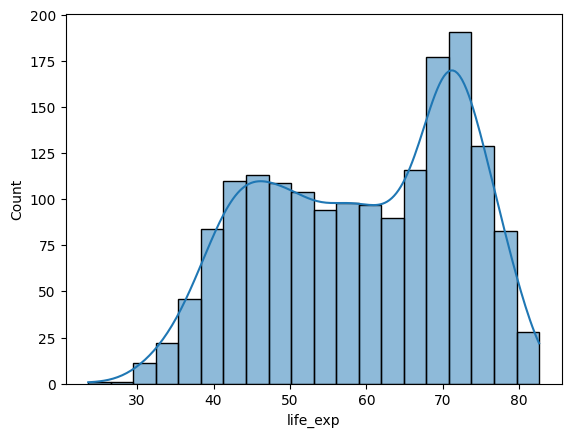

In [14]:
import seaborn as sns
sns.histplot(df['life_exp'], bins = 20, kde = True)

In [17]:
top5_gdp = df_2007.sort_values(by = 'gdp_cap', ascending = False).head(10)
top5_gdp

,country,year,population,continent,life_exp,gdp_cap,Unnamed: 6
1151,Norway,2007,4627926,Europe,80.196,49357.19017,9541.474188
863,Kuwait,2007,2505559,Asia,77.588,47306.98978,8941.571858
1367,Singapore,2007,4553009,Asia,79.972,47143.17964,9883.584648
1619,United States,2007,301139947,Americas,78.242,42951.65309,6150.772969
755,Ireland,2007,4109086,Europe,78.885,40675.99635,9498.467723
671,"Hong Kong, China",2007,6980412,Asia,82.208,39724.97867,9696.273295
1487,Switzerland,2007,7554661,Europe,81.701,37506.41907,7426.354774
1091,Netherlands,2007,16570613,Europe,79.762,36797.93332,9911.878226
251,Canada,2007,33390141,Americas,80.653,36319.23501,9325.068238
695,Iceland,2007,301931,Europe,81.757,36180.78919,9498.467723


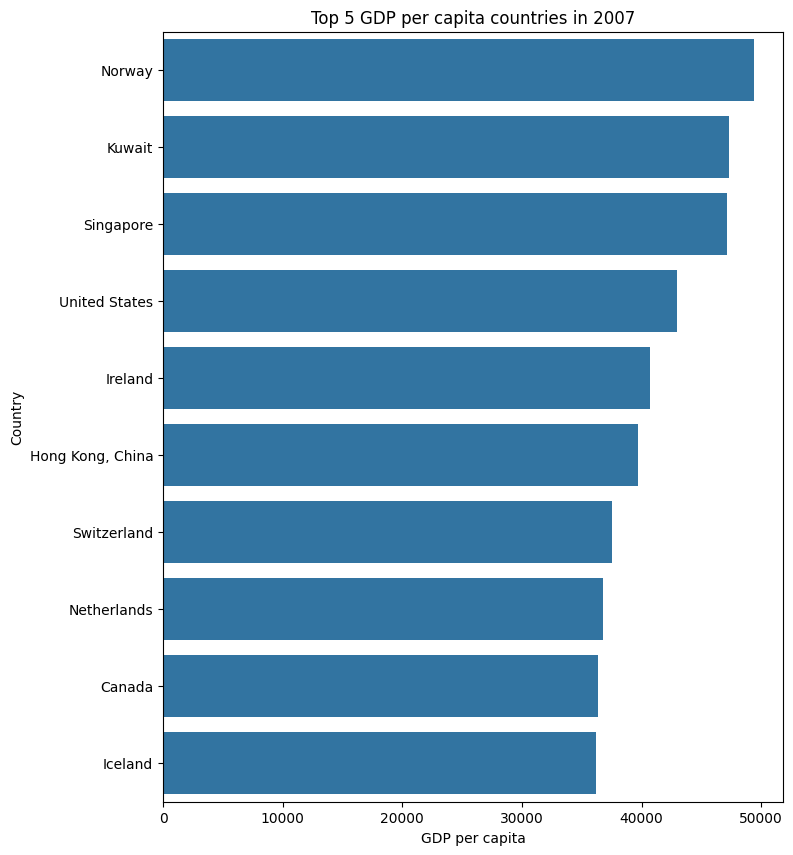

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 10))
sns.barplot(
    x = 'gdp_cap',
    y = 'country',
    data = top5_gdp
)
plt.title('Top 5 GDP per capita countries in 2007')
plt.xlabel('GDP per capita')
plt.ylabel('Country')
plt.show()

In [27]:
countries_regex = df[df['country'].str.contains(r'I.*a$', regex = True)]
countries_regex['country'].drop_duplicates()

696        India
708    Indonesia
Name: country, dtype: object

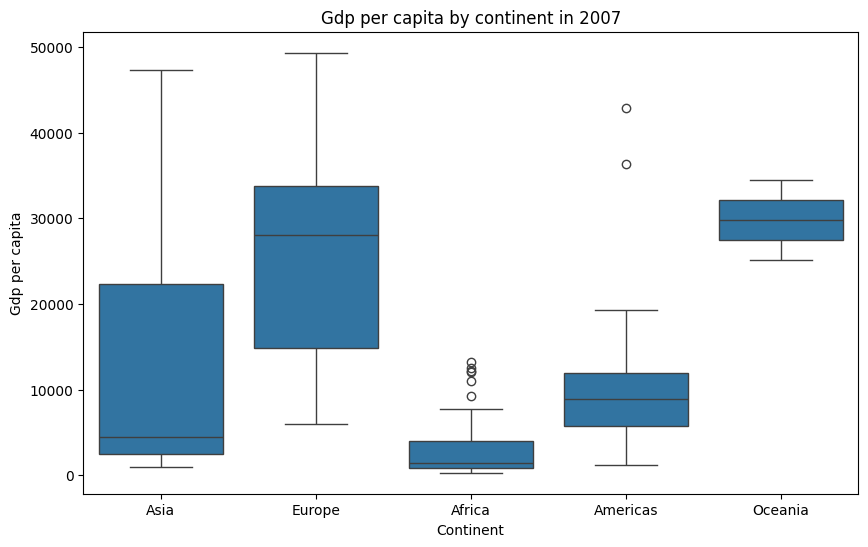

In [28]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_2007,
x = 'continent',
y = 'gdp_cap')
plt.title('Gdp per capita by continent in 2007')
plt.xlabel('Continent')
plt.ylabel('Gdp per capita')
plt.show()

In [29]:
high_life = df_2007[df_2007['life_exp']>80]
high_life[['country', 'continent']].sort_values(by = 'country')

,country,continent
71,Australia,Oceania
251,Canada,Americas
539,France,Europe
671,"Hong Kong, China",Asia
695,Iceland,Europe
767,Israel,Asia
779,Italy,Europe
803,Japan,Asia
1103,New Zealand,Oceania
1151,Norway,Europe


In [31]:
df['year_dt'] = pd.to_datetime(df['year'], format = '%Y')

In [32]:
df['Decade'] = df['year'] // 10 * 10
df['Decade'] = df['Decade'].astype(str) + 's'

In [33]:
df[['year', 'Decade']].drop_duplicates().head(10)

,year,Decade
0,1952,1950s
1,1957,1950s
2,1962,1960s
3,1967,1960s
4,1972,1970s
5,1977,1970s
6,1982,1980s
7,1987,1980s
8,1992,1990s
9,1997,1990s


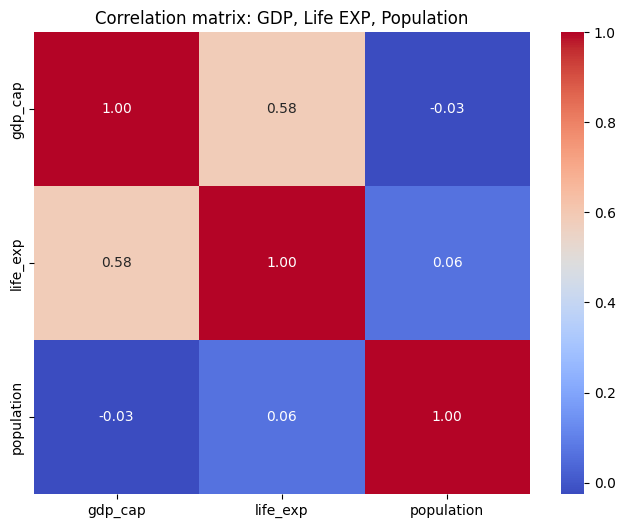

In [34]:
corr_data = df[['gdp_cap', 'life_exp', 'population']]
corr_matrix = corr_data.corr()
corr_matrix
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, 
annot = True,
cmap = 'coolwarm',
fmt = '.2f'
)
plt.title('Correlation matrix: GDP, Life EXP, Population')
plt.show()

In [35]:
global_life = df.groupby('year')['life_exp'].mean().reset_index()
global_life

,year,life_exp
0,1952,49.057620
1,1957,51.507401
2,1962,53.609249
3,1967,55.678290
4,1972,57.647386
5,1977,59.570157
6,1982,61.533197
7,1987,63.212613
8,1992,64.160338
9,1997,65.014676


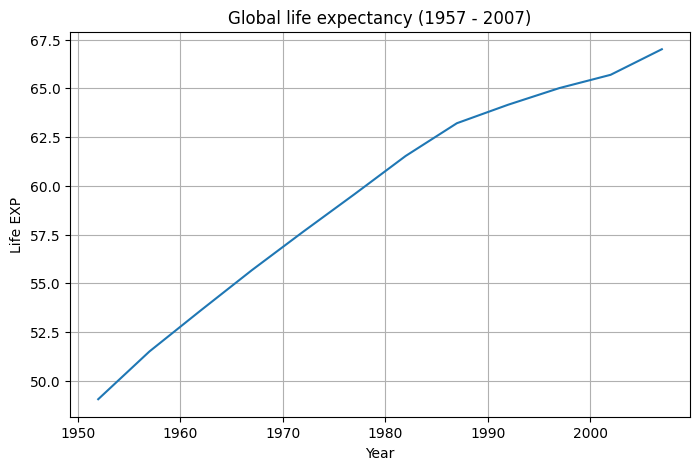

In [40]:
plt.figure(figsize = (8, 5))
plt.plot(global_life['year'], global_life['life_exp'])
plt.title("Global life expectancy (1957 - 2007)")
plt.xlabel('Year')
plt.ylabel("Life EXP")
plt.grid()
plt.show()

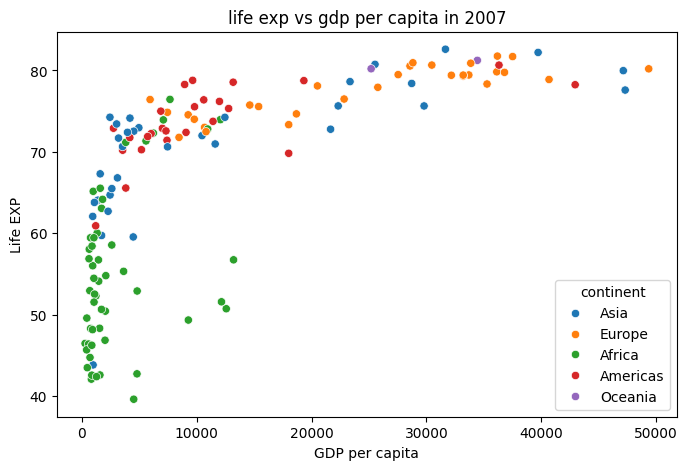

In [41]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = df_2007,
x = 'gdp_cap',
y = 'life_exp',
hue = 'continent')
plt.title('life exp vs gdp per capita in 2007')
plt.xlabel('GDP per capita')
plt.ylabel('Life EXP')
plt.show()

In [42]:
avg_gdp_continent = (
    df_2007.groupby('continent')['gdp_cap'].mean().reset_index()
)
avg_gdp_continent

,continent,gdp_cap
0,Africa,3089.032605
1,Americas,11003.031625
2,Asia,12473.026870
3,Europe,25054.481636
4,Oceania,29810.188275


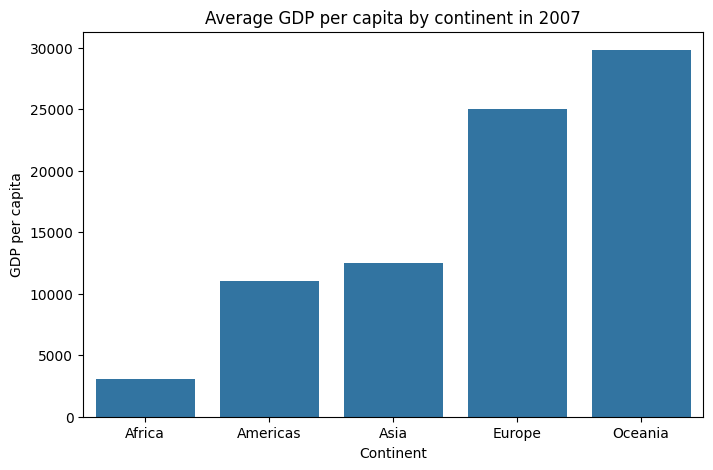

In [43]:
plt.figure(figsize = (8,5))
sns.barplot(
    data = avg_gdp_continent,
    x = 'continent',
    y = 'gdp_cap'
)
plt.title('Average GDP per capita by continent in 2007')
plt.xlabel("Continent")
plt.ylabel("GDP per capita")
plt.show()

In [46]:
countries = ['Afghanistan', 'Switzerland']
compare_countries = df_2007[df_2007['country'].isin(countries)]
compare_countries[['country', 'life_exp', 'gdp_cap']]

,country,life_exp,gdp_cap
11,Afghanistan,43.828,974.580338
1487,Switzerland,81.701,37506.419070


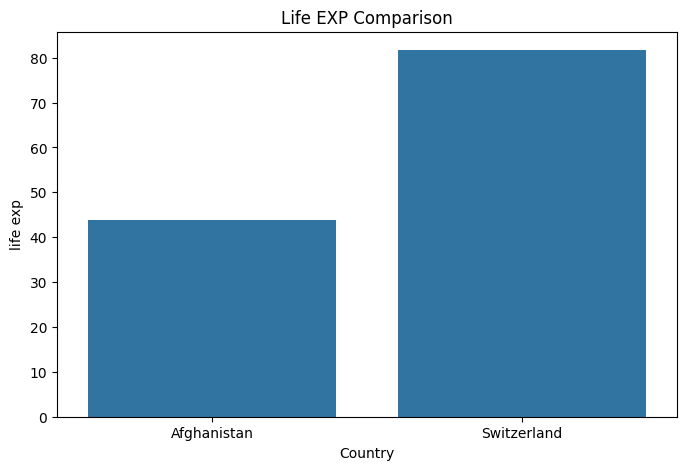

In [48]:
plt.figure(figsize = (8,5))
sns.barplot(
    data = compare_countries,
    x = 'country',
    y = 'life_exp'
)
plt.title('Life EXP Comparison')
plt.xlabel("Country")
plt.ylabel('life exp')
plt.show()